<h1><center>Exercise Sheet 7 Ulzii-Utas.N</center></h1>

# Exercise 1.1, 1.2, 1.3, 1.5

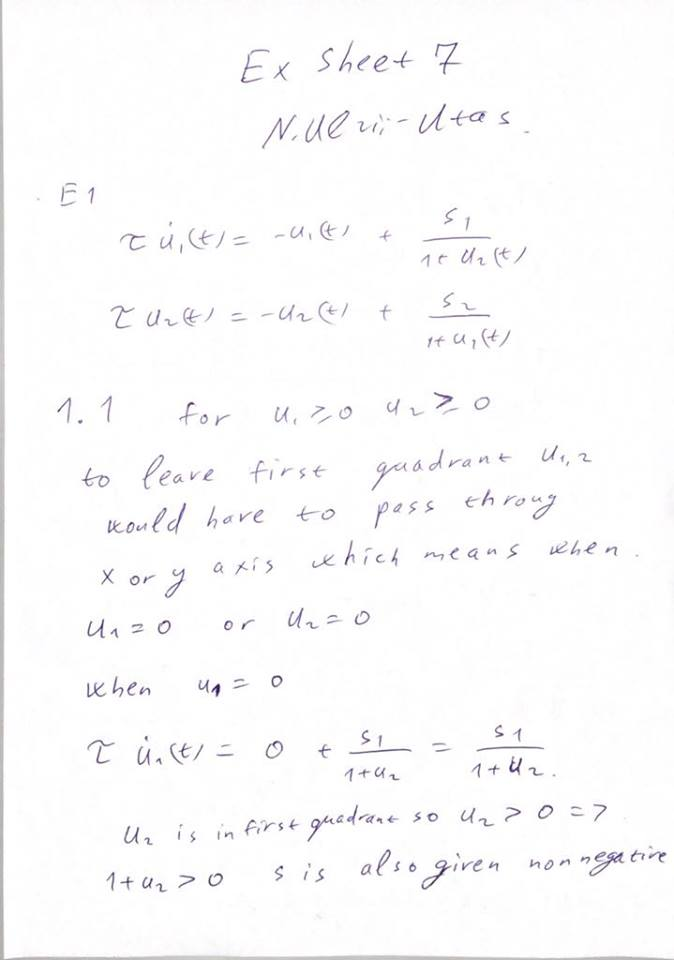

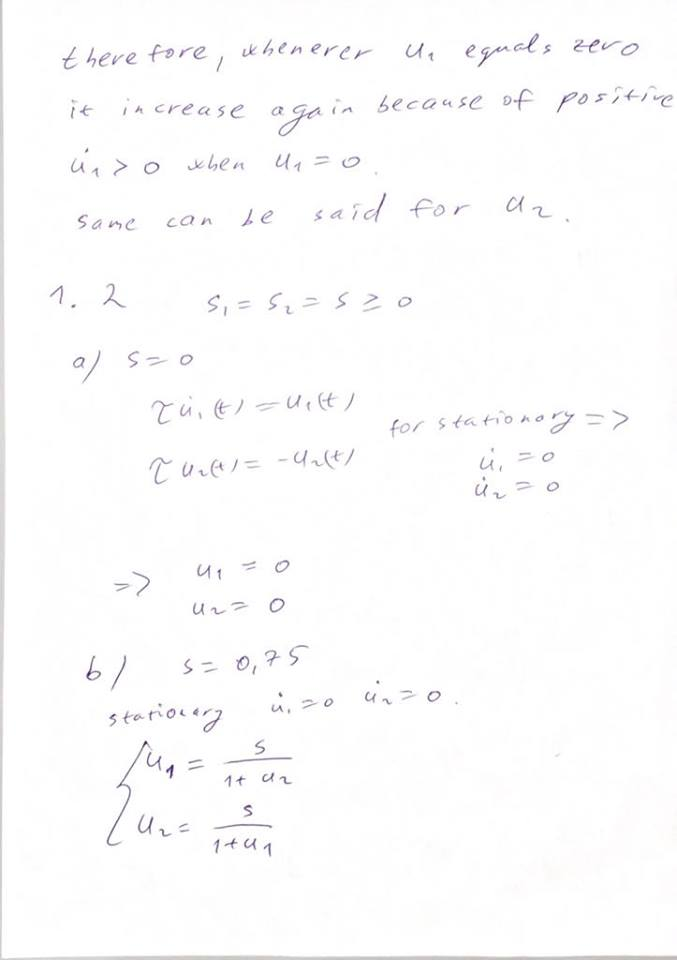

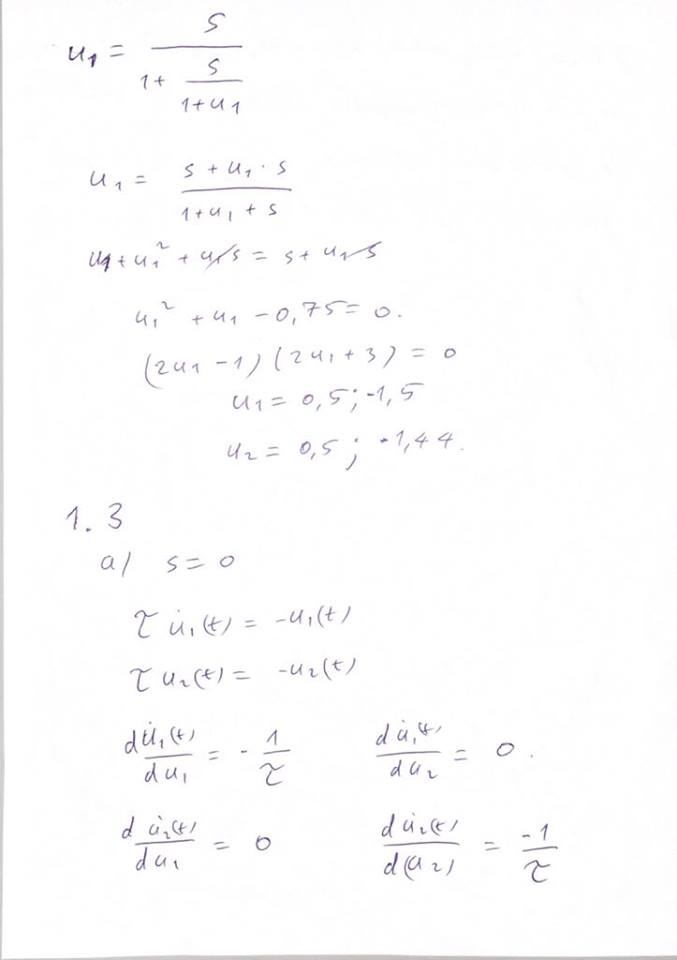

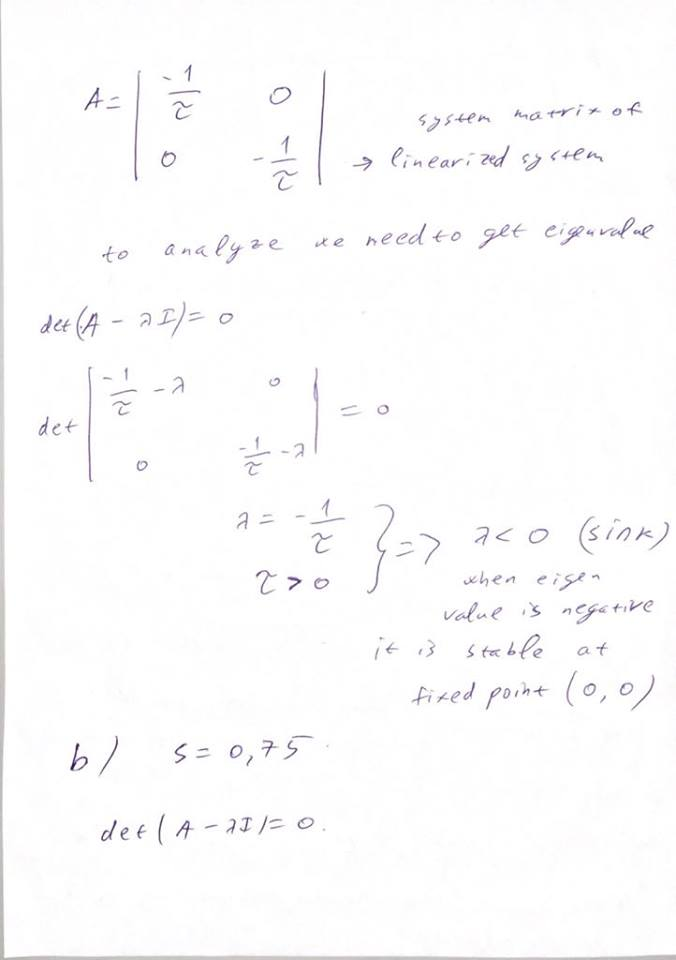

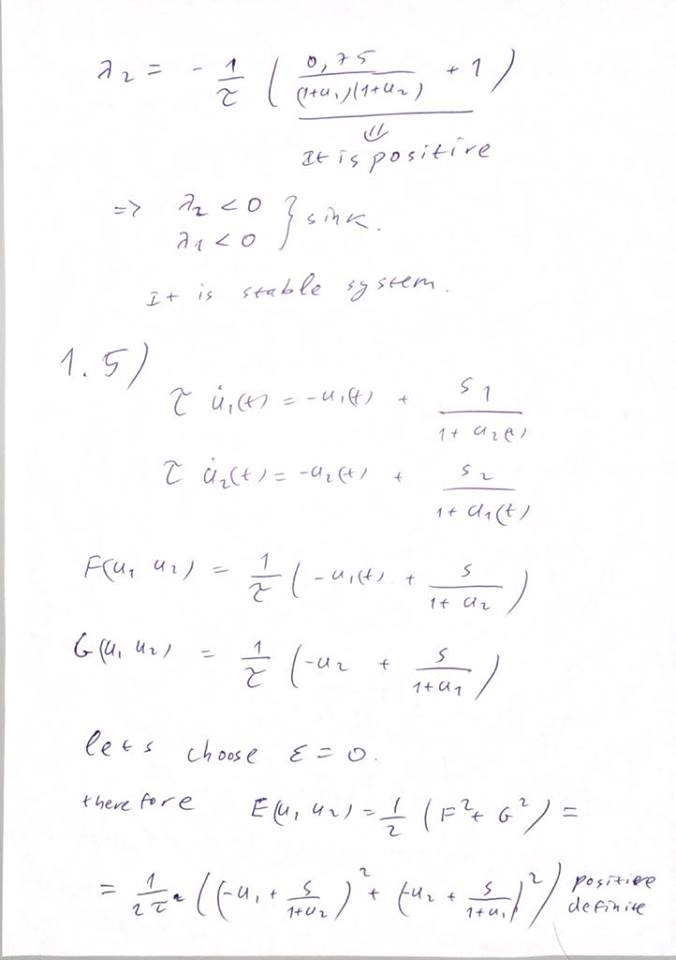

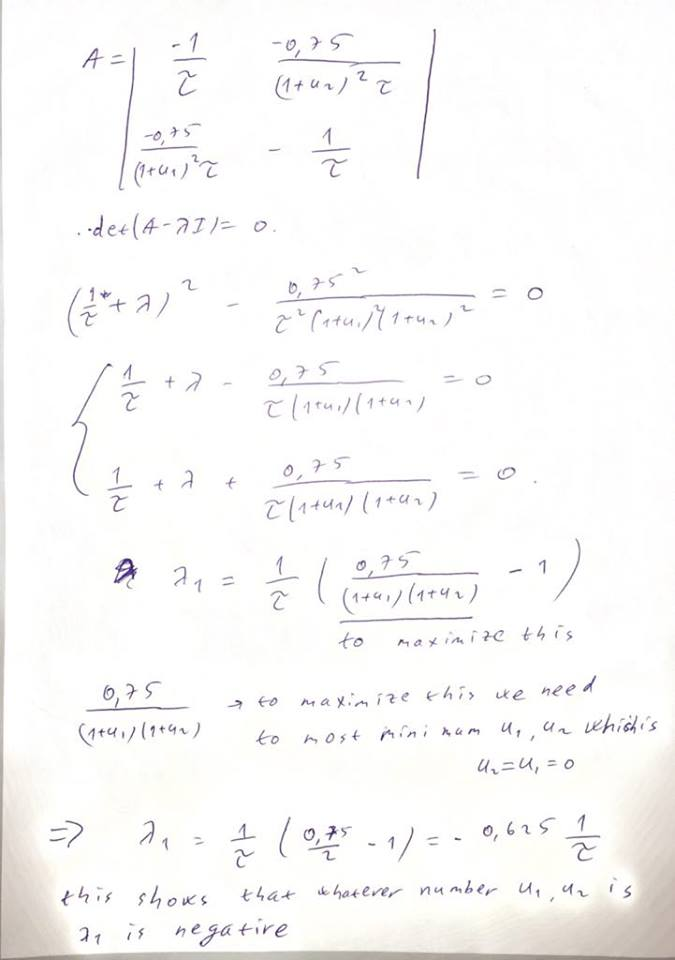

# Exercise 1.4
Plot the phase portraits for the two values of the stimulus signal and verify whether your computations are
correct.

In [52]:
import numpy as np
import mpmath as mpmath
import math as math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.linalg import expm, sinm, cosm
import random
%matplotlib inline

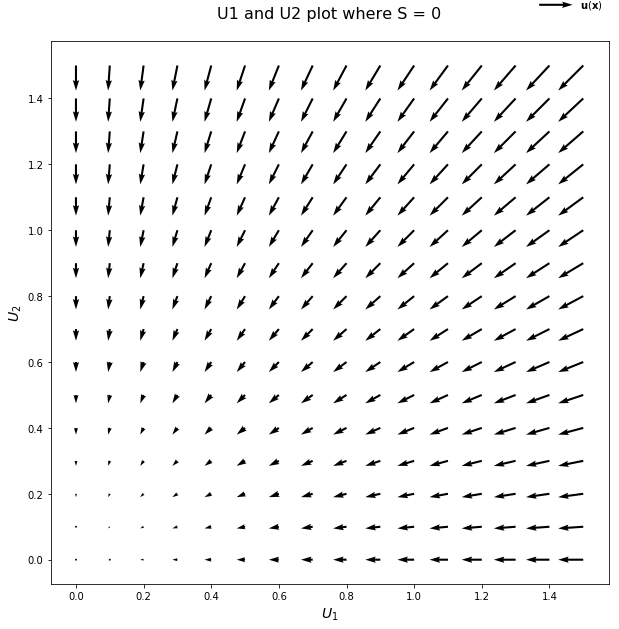

In [53]:
tau = 1
s = 0
s1 = s2 = s

u1, u2 = np.meshgrid(np.arange(0, 1.6, .1), np.arange(0, 1.6, .1))

U1 = (-u1 + s1 / (1 + u2)) / tau
U2 = (-u2 + s2 / (1 + u1)) / tau


plt.figure(figsize=(10, 10))
plt.title('U1 and U2 plot where S = 0', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$U_1$', fontsize=14)
plt.ylabel('$U_2$', fontsize=14)
plt.show()

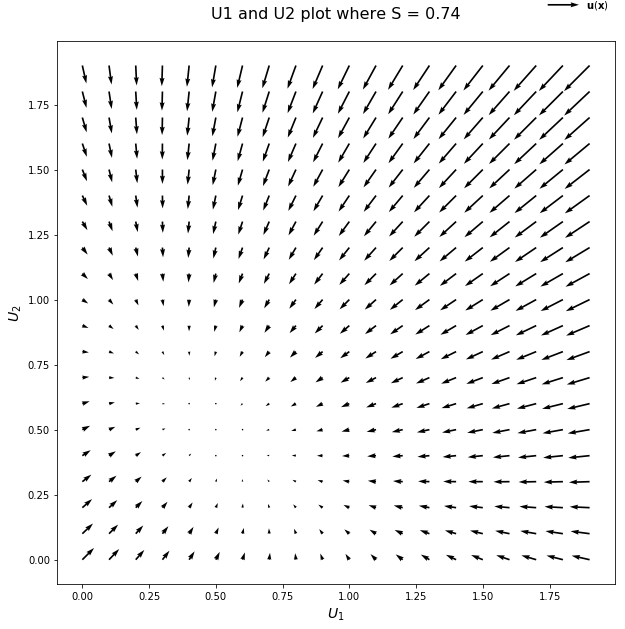

In [54]:
s = 3/4
s1 = s2 = s

u1, u2 = np.meshgrid(np.arange(0, 2, .1), np.arange(0, 2, .1))

U1 = (-u1 + s1 / (1 + u2)) / tau
U2 = (-u2 + s2 / (1 + u1)) / tau


plt.figure(figsize=(10, 10))
plt.title('U1 and U2 plot where S = 0.74', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$U_1$', fontsize=14)
plt.ylabel('$U_2$', fontsize=14)
plt.show()

# Exercise 2.1

In [16]:
M = np.array([[1, -0.1, -0.1], [-0.1, 1, -0.1], [-0.1, -0.1, -0.1]])

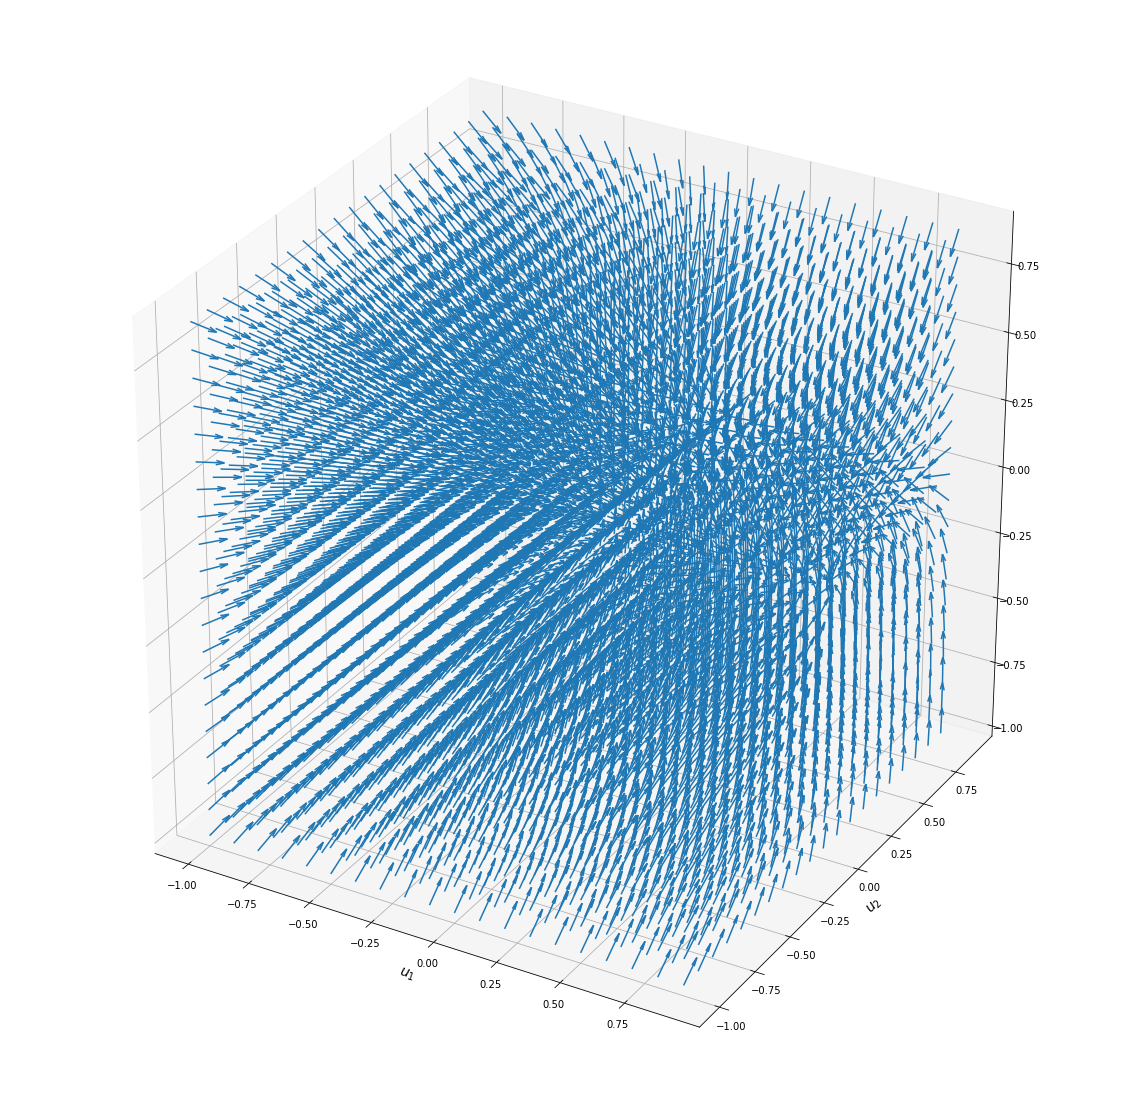

In [17]:
tau = 1

u1, u2, u3 = np.meshgrid(np.arange(-1, 1, .1), np.arange(-1, 1, .1), np.arange(-1, 1, .1))

max1 = u1 * M[0][0] + u2 * M[0][1] + u3 * M[0][2]
max2 = u1 * M[1][0] + u2 * M[1][1] + u3 * M[1][2]
max3 = u1 * M[2][0] + u2 * M[2][1] + u3 * M[2][2]
max1[max1 < 0] = 0
max2[max2 < 0] = 0
max3[max3 < 0] = 0

U1 = (-u1 +  max1) / tau
U2 = (-u2 +  max2) / tau
U3 = (-u3 +  max3) / tau

fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax.quiver(u1, u2, u3, U1, U2, U3, length=0.1, normalize=True)
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

Quiver Plot for the memory network

In [40]:
N = 1000

initial_points = np.zeros((N, 3))

for i in range(N):
    initial_points[i][0] = random.randint(-100,100)/100
    initial_points[i][1] = random.randint(-100,100)/100
    initial_points[i][2] = random.randint(-100,100)/100
    
initial_points_copy = initial_points * 1

Where i am initializing 1000 random initial points for the system

In [41]:
tau = 1
iterate = 10000

for i in range(N):

    for j in range (iterate):

        m1 = initial_points[i][0] * M[0][0] + initial_points[i][1] * M[0][1] + initial_points[i][2] * M[0][2]
        m2 = initial_points[i][0] * M[1][0] + initial_points[i][1] * M[1][1] + initial_points[i][2] * M[1][2]
        m3 = initial_points[i][0] * M[2][0] + initial_points[i][1] * M[2][1] + initial_points[i][2] * M[2][2]

        if m1 < 0:
            m1 = 0
        if m2 < 0:
            m2 = 0
        if m3 < 0:
            m3 = 0        
    
        U1 = (-initial_points[i][0] +  m1) / tau
        U2 = (-initial_points[i][1] +  m2) / tau
        U3 = (-initial_points[i][2] +  m3) / tau
        
        initial_points[i][0] = initial_points[i][0] + U1
        initial_points[i][1] = initial_points[i][1] + U2
        initial_points[i][2] = initial_points[i][2] + U3    


By iterating 10000 times the Initial points are stabilized in fixed points.

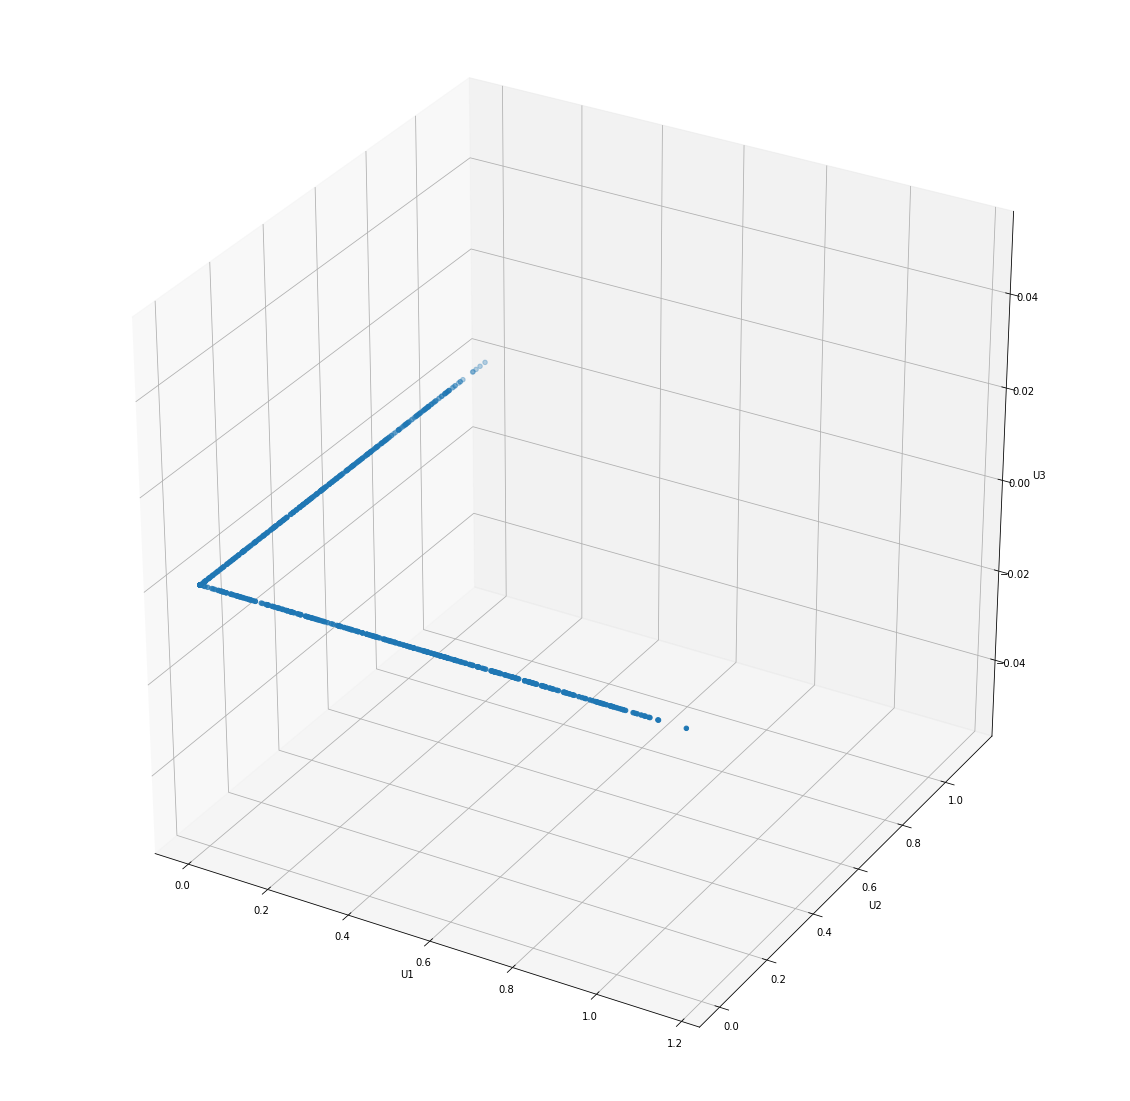

In [42]:
initial_points_transpose = np.transpose(initial_points)

fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax.scatter(initial_points_transpose[0], initial_points_transpose[1], initial_points_transpose[2])
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_zlabel('U3')
plt.show()

By 3d ploting the end result of initial points, We can see that some points are stabelized in (0, 0, 0) point but rest of the points are stabilezed in two lines. One Line is aloing the line of U1 where U2 = 0, U3 = 0. Other one is U2 where U1 = 0, U3 = 0

In [43]:
fixed_point_at_zero = []
fixed_point_at_u1 = []
fixed_point_at_u2 = []

original_point_at_zero = []
original_point_at_u1 = []
original_point_at_u2 = []

for i in range(N):
    if initial_points[i][0] == 0 and initial_points[i][1] == 0:
        fixed_point_at_zero.append(initial_points[i])
        original_point_at_zero.append(initial_points_copy[i])
        
    if initial_points[i][0] != 0 and initial_points[i][1] == 0:
        fixed_point_at_u1.append(initial_points[i])
        original_point_at_u1.append(initial_points_copy[i])
        
    if initial_points[i][0] == 0 and initial_points[i][1] != 0:
        fixed_point_at_u2.append(initial_points[i])
        original_point_at_u2.append(initial_points_copy[i])
        
original_point_at_zero = np.transpose(original_point_at_zero)
original_point_at_u1 = np.transpose(original_point_at_u1)
original_point_at_u2 = np.transpose(original_point_at_u2)

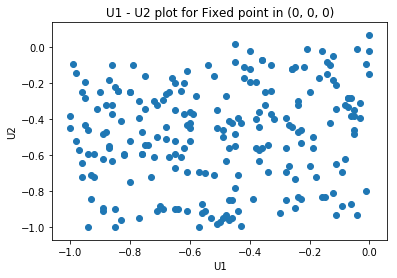

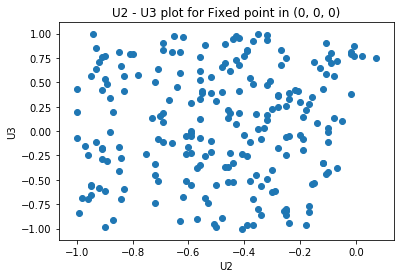

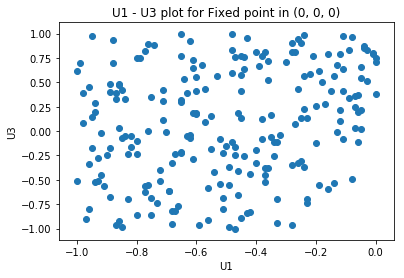

In [44]:
plt.scatter(original_point_at_zero[0], original_point_at_zero[1])
plt.title('U1 - U2 plot for Fixed point in (0, 0, 0)')
plt.xlabel('U1')
plt.ylabel('U2')
plt.show()
plt.scatter(original_point_at_zero[1], original_point_at_zero[2])
plt.title('U2 - U3 plot for Fixed point in (0, 0, 0)')
plt.xlabel('U2')
plt.ylabel('U3')
plt.show()
plt.scatter(original_point_at_zero[0], original_point_at_zero[2])
plt.title('U1 - U3 plot for Fixed point in (0, 0, 0)')
plt.xlabel('U1')
plt.ylabel('U3')
plt.show()

The condition for stabilizing in Fixed point (0, 0, 0) can be seen from the above plot which is U1 < 0 and U2 < 0. 

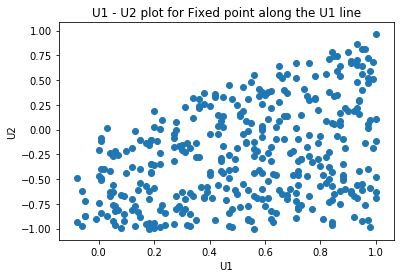

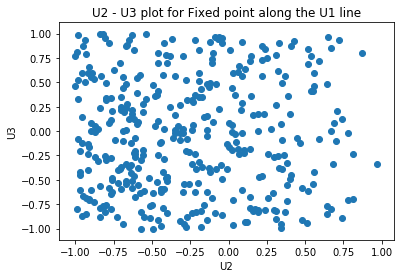

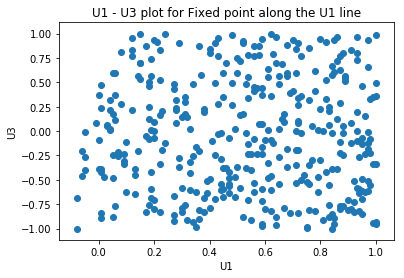

In [45]:
plt.scatter(original_point_at_u1[0], original_point_at_u1[1])
plt.title('U1 - U2 plot for Fixed point along the U1 line')
plt.xlabel('U1')
plt.ylabel('U2')
plt.show()
plt.scatter(original_point_at_u1[1], original_point_at_u1[2])
plt.title('U2 - U3 plot for Fixed point along the U1 line')
plt.xlabel('U2')
plt.ylabel('U3')
plt.show()
plt.scatter(original_point_at_u1[0], original_point_at_u1[2])
plt.title('U1 - U3 plot for Fixed point along the U1 line')
plt.xlabel('U1')
plt.ylabel('U3')
plt.show()

Here, When the points are stabilized along the U1 line, The relation between U1 and U2 can be seen from the first plot. All, the points below the line U1 = U2 is stabilized in U1 line.

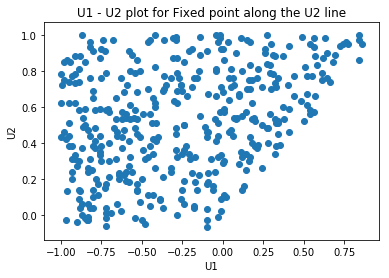

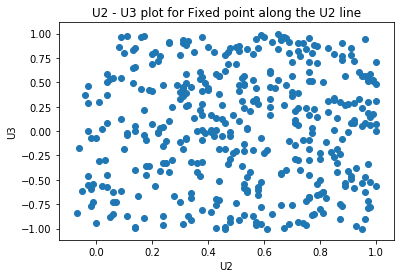

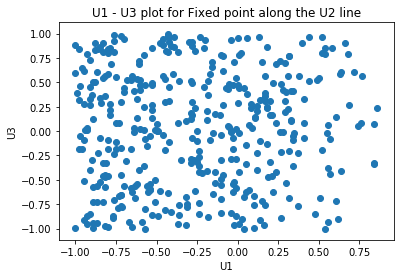

In [46]:
plt.scatter(original_point_at_u2[0], original_point_at_u2[1])
plt.title('U1 - U2 plot for Fixed point along the U2 line')
plt.xlabel('U1')
plt.ylabel('U2')
plt.show()
plt.scatter(original_point_at_u2[1], original_point_at_u2[2])
plt.title('U2 - U3 plot for Fixed point along the U2 line')
plt.xlabel('U2')
plt.ylabel('U3')
plt.show()
plt.scatter(original_point_at_u2[0], original_point_at_u2[2])
plt.title('U1 - U3 plot for Fixed point along the U2 line')
plt.xlabel('U1')
plt.ylabel('U3')
plt.show()

The opposite can be seen from the above U1 = U2 line where the points are all stabilized along the U2 line

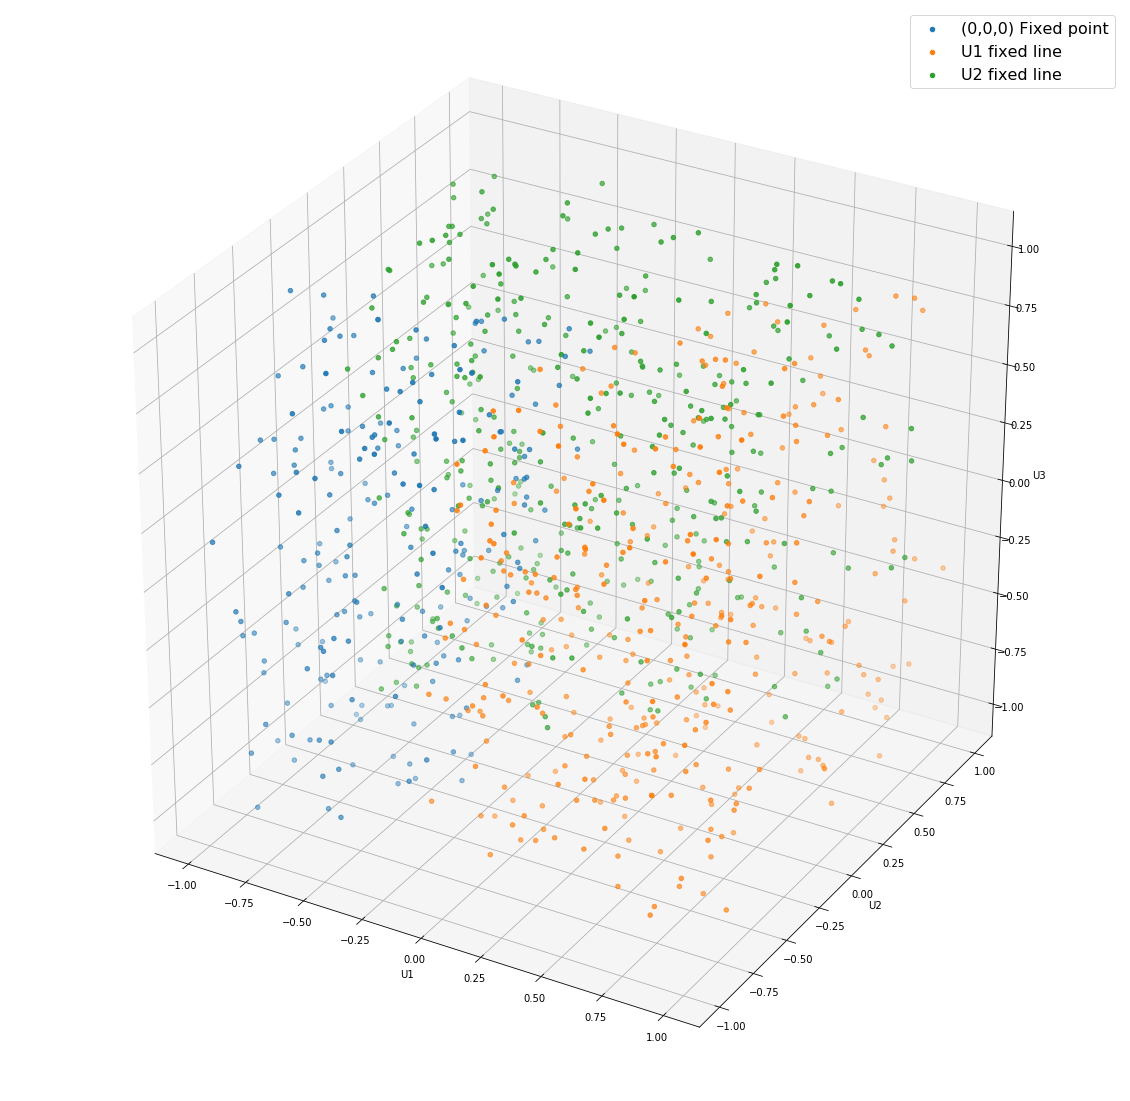

In [51]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax0 = ax.scatter(original_point_at_zero[0], original_point_at_zero[1], original_point_at_zero[2])
ax1 = ax.scatter(original_point_at_u1[0], original_point_at_u1[1], original_point_at_u1[2])
ax2 = ax.scatter(original_point_at_u2[0], original_point_at_u2[1], original_point_at_u2[2])
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_zlabel('U3')
plt.legend((ax0, ax1, ax2), ('(0,0,0) Fixed point', 'U1 fixed line', 'U2 fixed line'), fontsize = 16)
plt.show()

In this 3d plot, Points U1 < 0 and U2 < 0 is stabilized in (0, 0, 0) fixed point and is colored in blue. 

Points Above the line of U1 = U2 is color in green and these points stabilized along the line of U2 where U1 = 0, U3 = 0.

Points Below the line of U1 = U2 is color in yellow and these points stabilized along the line of U1 where U2 = 0, U3 = 0.

# Exercise 2.2

As iteration goes to infinity the values didnt change anymore so that shows the stability of the stable state.

# Exercise 2.3

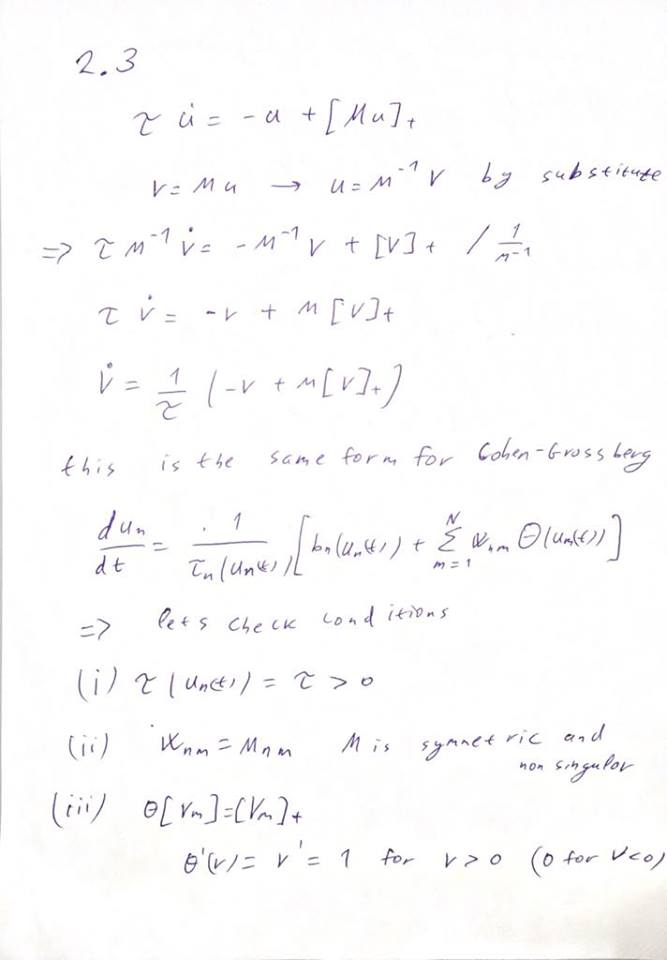

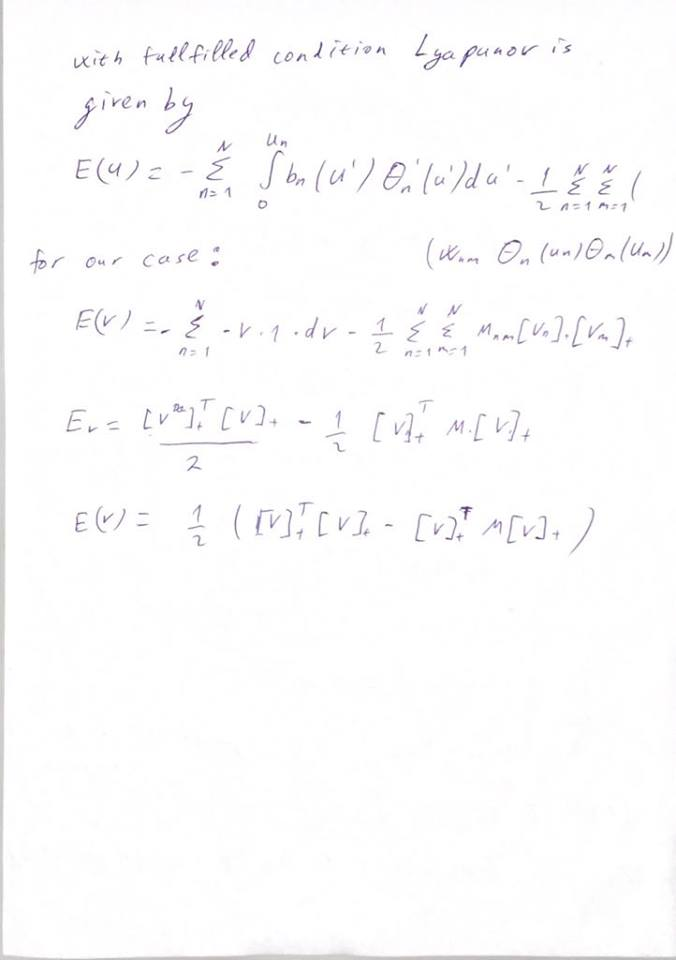

# Exercise 3.1

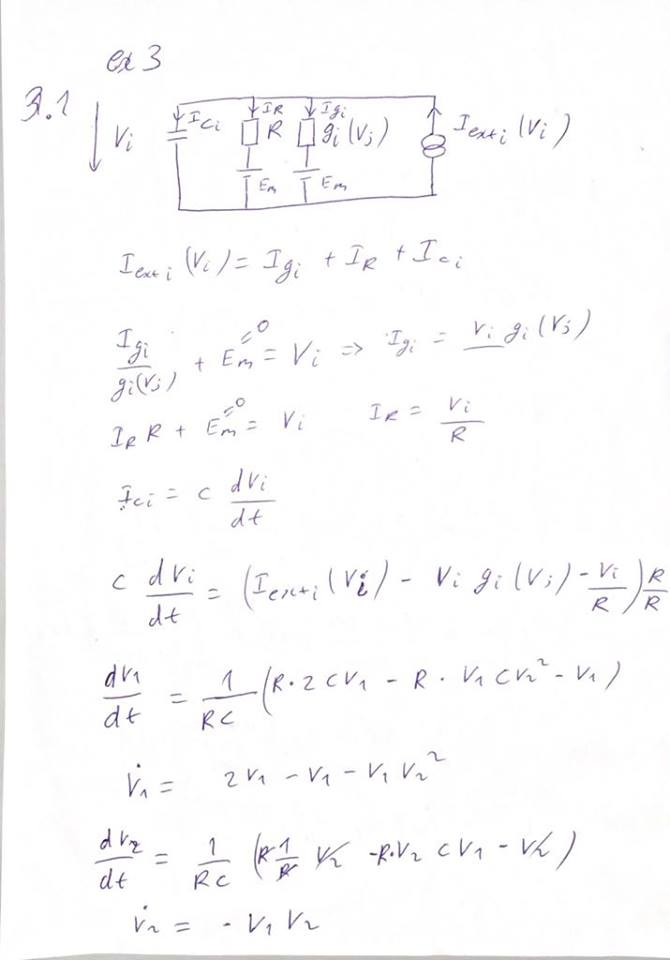

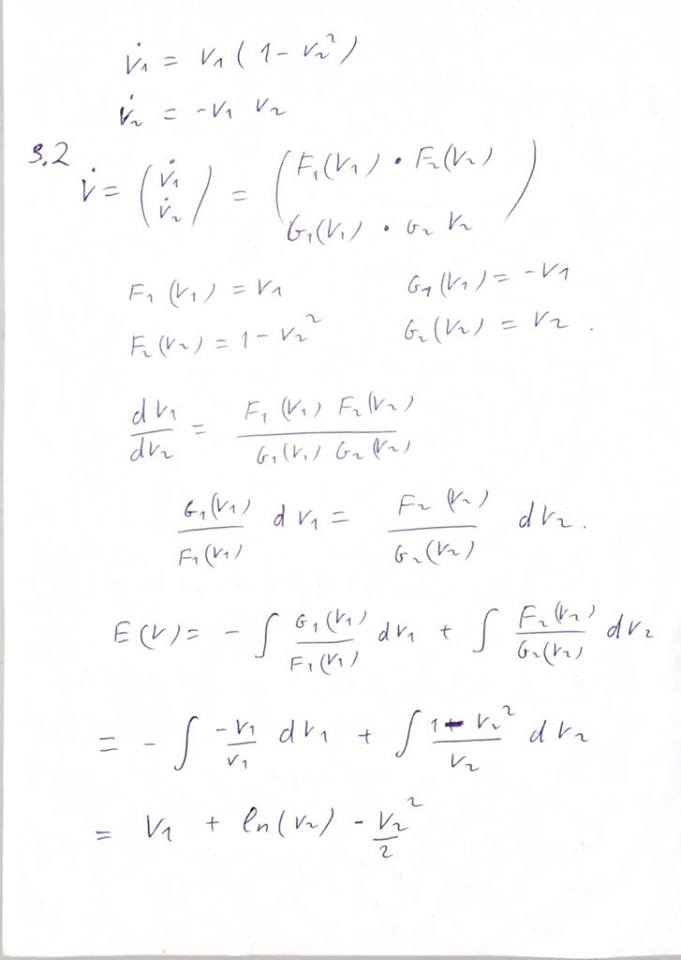